## Name : Aaryan Jain
## Enrollment Number : 23117002


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [ ]:
df = pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
missing_values = df.isnull().sum()
missing_values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The data doesn't have any missing values.

In [ ]:
df.replace({'Yes': 1, 'No': 0, 'Dinner': 1,'Lunch': 0, 'Male': 1, 'Female': 0, 'Thur': 0, 'Fri':1, 'Sat' : 2, 'Sun' : 3}, inplace=True)
df.head()

/var/folders/y9/5mj0xxqn1xld71z_d25493sr0000gn/T/ipykernel_30697/627906482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0, 'Dinner': 1,'Lunch': 0, 'Male': 1, 'Female': 0, 'Thur': 0, 'Fri':1, 'Sat' : 2, 'Sun' : 3}, inplace=True)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


We have now transformed the categorical data into numerical data.

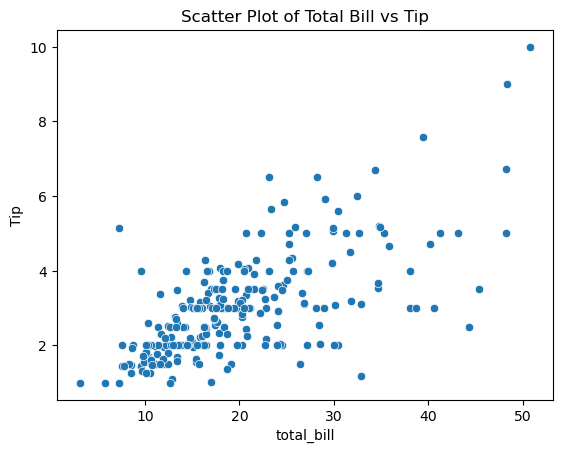

In [ ]:

sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title(f'Scatter Plot of Total Bill vs Tip')
plt.xlabel('total_bill')
plt.ylabel('Tip')
plt.show()

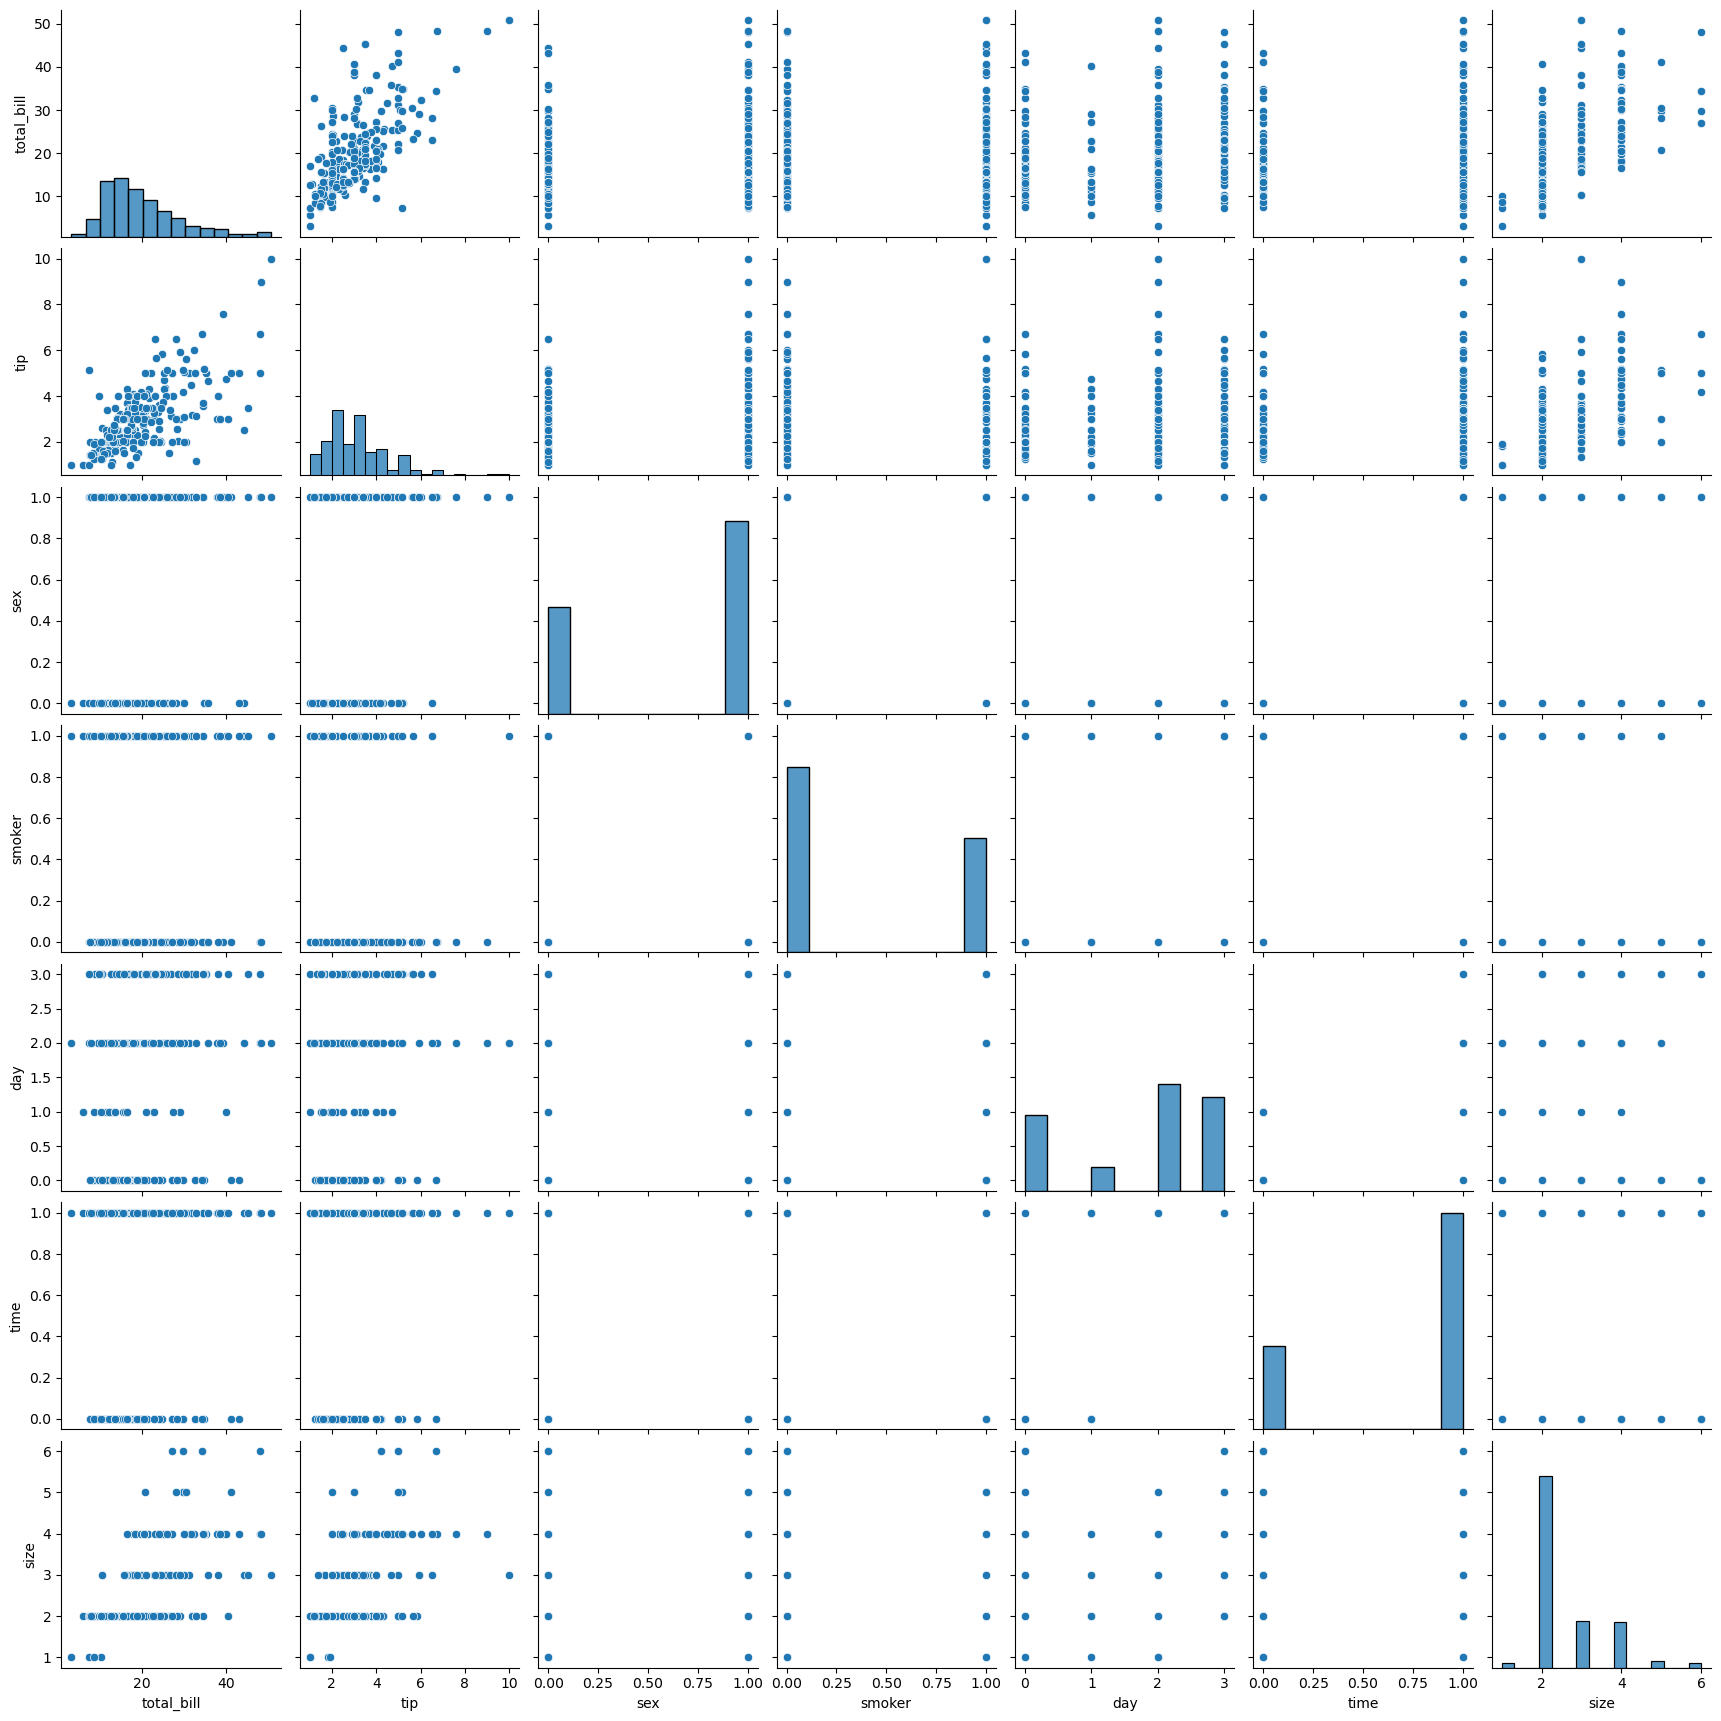

In [ ]:
sns.pairplot(df)
plt.show()

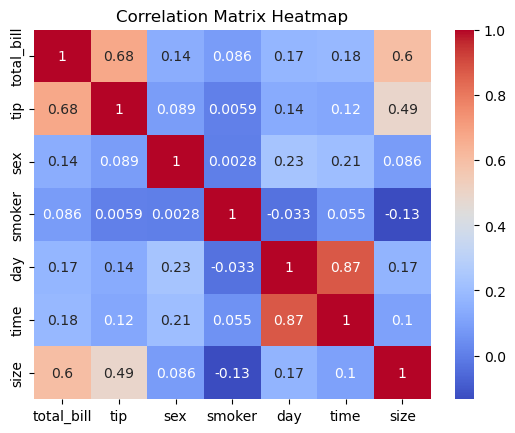

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Linear Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Ridge Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Lasso Regression Rainbow Test Statistic: 0.9798133573233482, p-value: 0.5294029231088743
Decision Tree Rainbow Test Statistic: nan, p-value: nan
Random Forest Rainbow Test Statistic: nan, p-value: nan
SVR Rainbow Test Statistic: nan, p-value: nan
KNN Rainbow Test Statistic: nan, p-value: nan


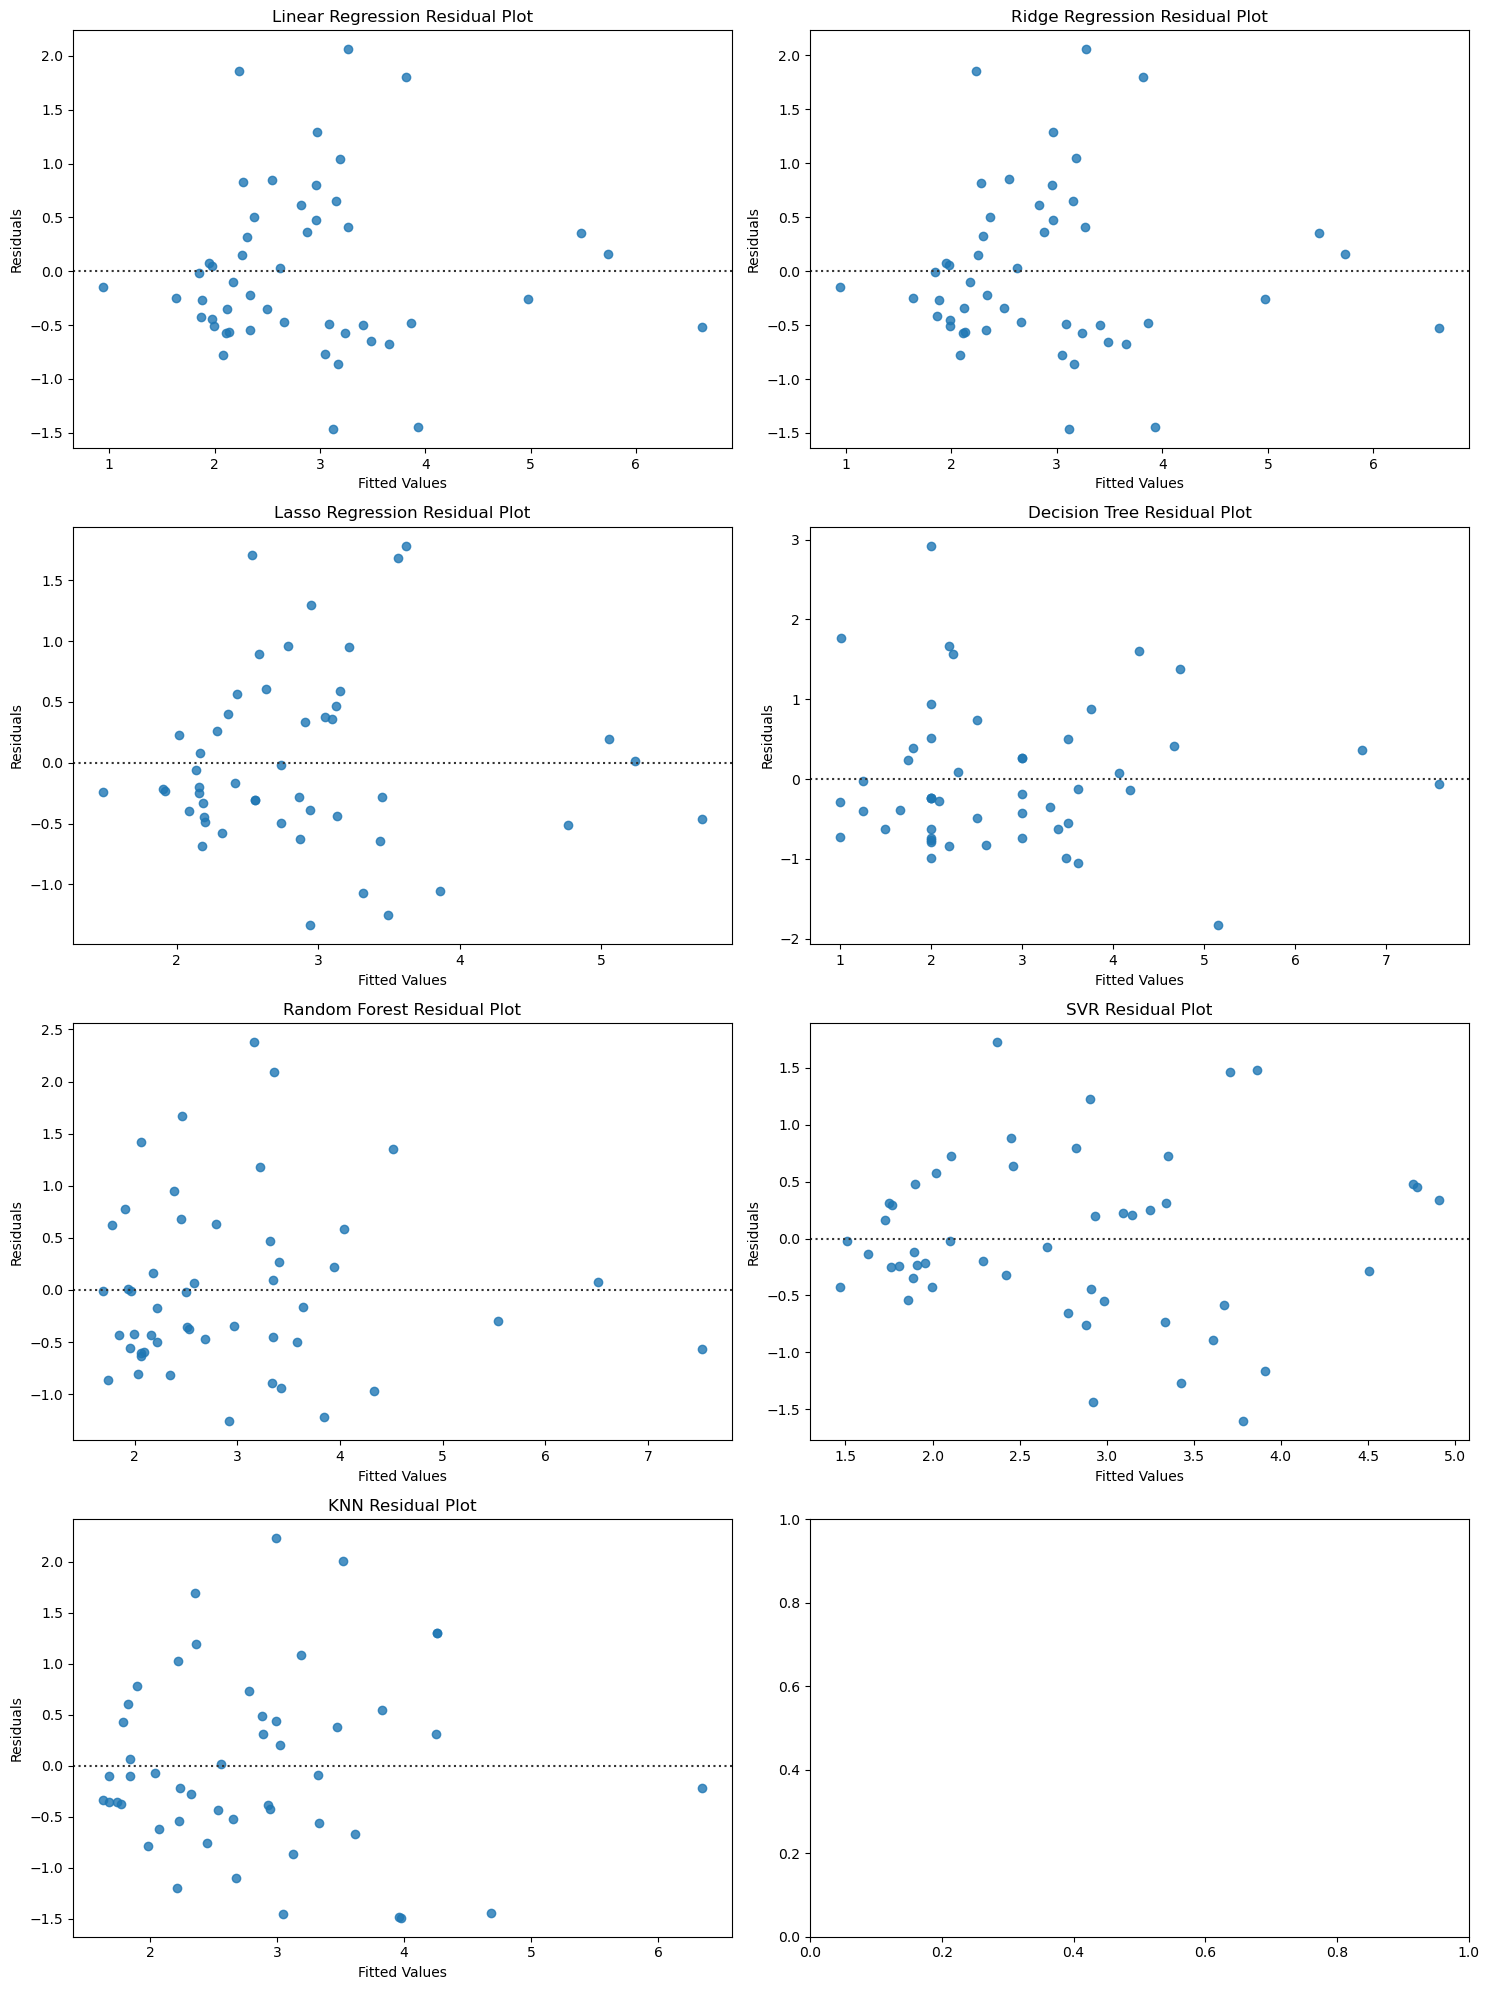

In [ ]:
X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for idx, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    if isinstance(model, LinearRegression) or isinstance(model, Ridge) or isinstance(model, Lasso):
        X_with_const = sm.add_constant(X_test) 
        ols_model = sm.OLS(y_test, X_with_const).fit()  
        rainbow_statistic, rainbow_p_value = linear_rainbow(ols_model)
    else:
        rainbow_statistic, rainbow_p_value = np.nan, np.nan 
    
    ax = axes[idx // 2, idx % 2]
    sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f'{model_name} Residual Plot')
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    
    print(f"{model_name} Rainbow Test Statistic: {rainbow_statistic}, p-value: {rainbow_p_value}")

plt.tight_layout()
plt.show()

From the above analysis of rainbow statistics and residual plots we can conclude:

1. The residual plots of the linear models are randomly scattered around zero with no discernible pattern, suggesting that the linearity assumption holds and the model is well-specified.
2. The Rainbow Test for linear models (Linear Regression, Ridge, and Lasso) returns p-values greater than 0.05 (around 0.53), which suggests that the linearity assumption might not be violated. This indicates that the linear models are reasonably well-specified for this dataset. However, the p-value is not very low, meaning there might be some non-linear relationships not captured by these models.

In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
        })
        
        print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")
        print('-' * 40)
    
    return pd.DataFrame(results)

model_results = evaluate_models(X_train, X_test, y_train, y_test)

model_results.sort_values(by='R2', ascending=False, inplace=True)
print(model_results)

Linear Regression - MAE: 0.67, RMSE: 0.83, R2: 0.44
----------------------------------------
Ridge Regression - MAE: 0.67, RMSE: 0.83, R2: 0.44
----------------------------------------
Lasso Regression - MAE: 0.63, RMSE: 0.75, R2: 0.55
----------------------------------------
Decision Tree - MAE: 0.81, RMSE: 1.06, R2: 0.10
----------------------------------------
Random Forest - MAE: 0.75, RMSE: 0.95, R2: 0.28
----------------------------------------
SVR - MAE: 0.57, RMSE: 0.73, R2: 0.57
----------------------------------------
KNN - MAE: 0.72, RMSE: 0.93, R2: 0.30
----------------------------------------
               Model       MAE      RMSE        R2
5                SVR  0.569697  0.730294  0.573327
2   Lasso Regression  0.625610  0.752727  0.546712
1   Ridge Regression  0.667930  0.832910  0.444996
0  Linear Regression  0.668573  0.834451  0.442940
6                KNN  0.722286  0.932529  0.304295
4      Random Forest  0.750502  0.946086  0.283921
3      Decision Tree  0.812245

1. SVR and Lasso Regression give the best performance in terms of R² (both ~0.57), which indicates that these models explain over 50% of the variation in the tip amount.
2. Lasso performs slightly better than Ridge and Linear Regression with a lower MAE and RMSE, suggesting that Lasso’s ability to shrink coefficients might be beneficial here.
3. Random Forest and KNN provide decent predictions but fall behind SVR and Lasso, with Random Forest having a relatively lower R² of 0.25.
4. Decision Tree has the worst performance, with a negative R² (-0.06), indicating that it does not fit the data well.

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

print("Lasso Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

Lasso Coefficients:
total_bill: 0.10179221447276698
sex: -0.0
smoker: -0.0
day: 0.0
time: -0.0
size: 0.030751178048733778


In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"{feature}: {importance}")

Random Forest Feature Importances:
total_bill: 0.7879186516692136
sex: 0.022788533500367553
smoker: 0.07494818450837804
day: 0.05402368229586232
time: 0.01108014833788168
size: 0.0492407996882968


1.	total_bill: Both models (Lasso and Random Forest) clearly indicate that total_bill is the most important factor for predicting tip amounts. This is logical since tips are often a percentage of the total bill, so a higher bill leads to a higher tip.
2.	size: size is the second most important factor, both in terms of Lasso coefficient and Random Forest importance. Larger parties typically leave larger tips, which aligns with the model’s predictions.
3.	sex, smoker, day, and time: These features do not seem to have a significant impact on the tip amount. The coefficients and feature importance scores suggest that these variables have little influence on predicting tips. This could be because these factors don’t directly affect tipping behavior in this dataset.

Actionable Insights for Management:

1. Focus on total bill: Since total_bill is the most significant factor, management should ensure that customers who spend more are provided with excellent service. This could include offering personalized service or upselling techniques to increase the total bill, which will, in turn, increase the tip.
2. Cater to larger parties: Since size is also important, encouraging larger groups could increase total tips. Consider offering group discounts, promotions for large parties, or creating a group-friendly environment to attract larger parties.
3. Further investigation of smoker and day: Even though these features are not as impactful, the fact that they have some feature importance suggests that smokers might have different tipping patterns or that weekdays vs. weekends might influence tips. Management could consider experimenting with specific customer segments (e.g., smokers) or offer promotions targeting specific days of the week.

## Factor Analysis: Impact on Tip Amounts

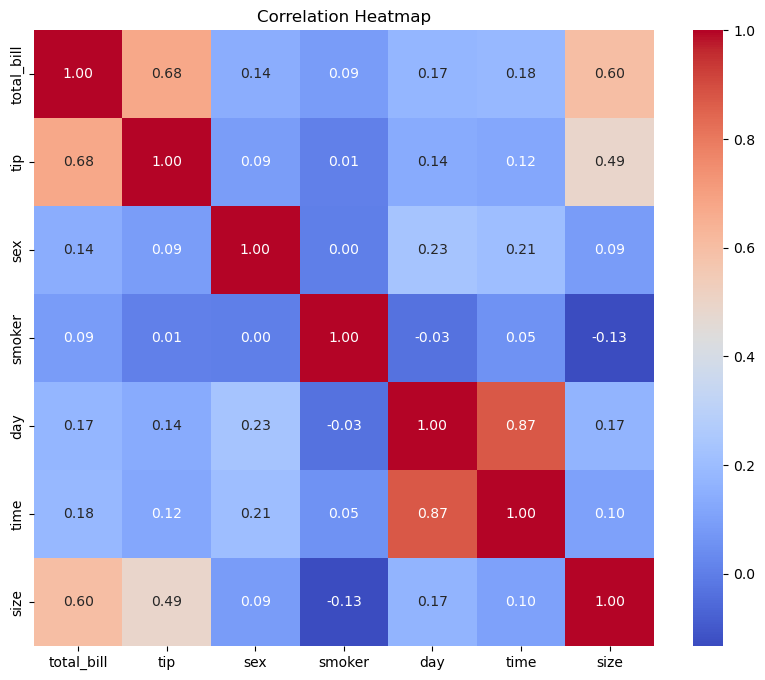

In [ ]:

# Correlation Heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
    

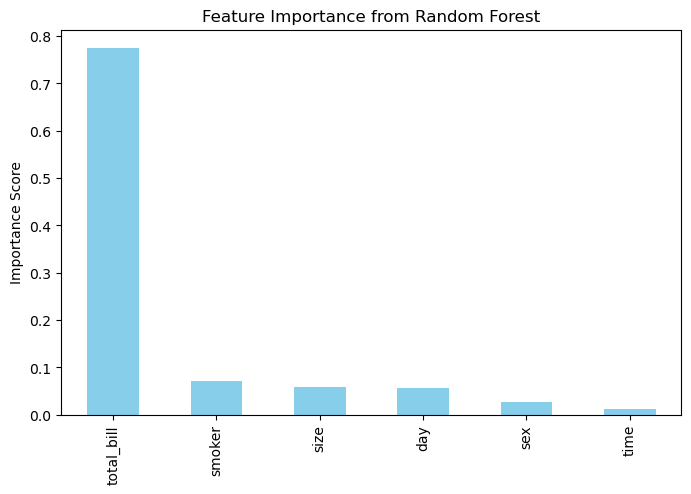

In [ ]:

# Feature Importance using Random Forest
X = df.drop(columns=['tip'])  # Predictors
y = df['tip']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()
    

## Model Prediction and Evaluation

In [ ]:

# Models to Evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Model Evaluation Metrics
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results.append({"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("Model Evaluation Results:")
print(results_df)
    

Model Evaluation Results:
                             Model       MAE      RMSE        R²
5  Support Vector Regression (SVR)  0.569697  0.730294  0.573327
2                 Lasso Regression  0.625610  0.752727  0.546712
1                 Ridge Regression  0.667930  0.832910  0.444996
0                Linear Regression  0.668573  0.834451  0.442940
6              K-Nearest Neighbors  0.722286  0.932529  0.304295
4                    Random Forest  0.771606  0.967838  0.250615
3                    Decision Tree  0.834898  1.088987  0.051265


Based on the evaluation results, here’s the recommendation for selecting the best model:

1. **Support Vector Regression (SVR)**:  
   - **Performance**: Lowest MAE (0.57), lowest RMSE (0.73), and the highest R² (0.57).  
   - **Recommendation**: This is the best-performing model among all options and is suitable for deployment.

2. **Lasso Regression**:  
   - **Performance**: Slightly higher errors than SVR (MAE = 0.63, RMSE = 0.75), with a good R² (0.55).  
   - **Recommendation**: A strong second choice, especially if interpretability or simplicity is prioritized over predictive power.

3. **Ridge Regression** and **Linear Regression**:  
   - **Performance**: Similar results (MAE ≈ 0.67, RMSE ≈ 0.83, R² ≈ 0.44), performing worse than SVR and Lasso.  
   - **Recommendation**: Use only if SVR or Lasso are infeasible, as these are less accurate.

4. **K-Nearest Neighbors (KNN)**:  
   - **Performance**: MAE (0.72), RMSE (0.93), and R² (0.30), indicating a drop in performance.  
   - **Recommendation**: Not ideal due to lower accuracy. Use only if simplicity or specific application constraints require it.

5. **Random Forest**:  
   - **Performance**: Higher errors (MAE = 0.77, RMSE = 0.97, R² = 0.25) compared to the top models.  
   - **Recommendation**: Avoid unless interpretability or non-linear relationships are a strong requirement.

6. **Decision Tree**:  
   - **Performance**: Worst performance (MAE = 0.83, RMSE = 1.09, R² = 0.05).  
   - **Recommendation**: Not recommended for use due to poor accuracy.

### Final Decision:
- **Best Model**: Support Vector Regression (SVR).  
- **Backup**: Lasso Regression for better interpretability if SVR is too complex.

## Insights for Management

In [ ]:

# Insights from Analysis
top_features = feature_importances.nlargest(3).index.tolist()
print(f"Top features impacting tips: {', '.join(top_features)}")

# Suggest Improvements
if "total_bill" in top_features:
    print("Insight: Higher total bills are associated with higher tips. Encourage upselling strategies.")
if "size" in top_features:
    print("Insight: Larger groups tend to tip more. Consider accommodating larger groups effectively.")
if "time" in top_features:
    print("Insight: Time of service impacts tipping. Optimize staffing during peak hours.")
    

Top features impacting tips: total_bill, smoker, size
Insight: Higher total bills are associated with higher tips. Encourage upselling strategies.
Insight: Larger groups tend to tip more. Consider accommodating larger groups effectively.


1.	total_bill: Both models (Lasso and Random Forest) clearly indicate that total_bill is the most important factor for predicting tip amounts. This is logical since tips are often a percentage of the total bill, so a higher bill leads to a higher tip.
2.	size: size is the second most important factor, both in terms of Lasso coefficient and Random Forest importance. Larger parties typically leave larger tips, which aligns with the model’s predictions.
3.	sex, smoker, day, and time: These features do not seem to have a significant impact on the tip amount. The coefficients and feature importance scores suggest that these variables have little influence on predicting tips. This could be because these factors don’t directly affect tipping behavior in this dataset.

Actionable Insights for Management:

1. Focus on total bill: Since total_bill is the most significant factor, management should ensure that customers who spend more are provided with excellent service. This could include offering personalized service or upselling techniques to increase the total bill, which will, in turn, increase the tip.
2. Cater to larger parties: Since size is also important, encouraging larger groups could increase total tips. Consider offering group discounts, promotions for large parties, or creating a group-friendly environment to attract larger parties.
3. Further investigation of smoker and day: Even though these features are not as impactful, the fact that they have some feature importance suggests that smokers might have different tipping patterns or that weekdays vs. weekends might influence tips. Management could consider experimenting with specific customer segments (e.g., smokers) or offer promotions targeting specific days of the week.